In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
df = pd.read_csv('../../Data/Chapter_1_cleaned_data.csv')

In [3]:
features_response = df.columns.tolist()

In [4]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [5]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [17]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
                 df['default payment next month'].values,
                 test_size=0.2, random_state=24)

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Activity 5.01: Cross-Validation Grid Search with Random Forest

In [10]:
rf_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [19]:
# rf = RandomForestClassifier\
# (n_estimators=10, criterion='gini', max_depth=3,
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
# bootstrap=True, oob_score=False, n_jobs=None,
# random_state=4, verbose=0, warm_start=False, class_weight=None)

rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3)

In [20]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc',
                     n_jobs=-1, refit=True, cv=4, verbose=2,
                     error_score=np.nan, return_train_score=True)

In [21]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [22]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

In [28]:
cv_rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.394757,0.073665,0.036078,0.021737,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.740580,0.745034,0.766593,0.765653,0.754465,0.011769,16,0.769439,0.765685,0.758693,0.763383,0.764300,0.003893
1,2.393302,0.347986,0.041216,0.007766,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.744298,0.751222,0.778775,0.772478,0.761693,0.014320,13,0.772229,0.771751,0.766201,0.768013,0.769548,0.002530
2,4.924188,0.242814,0.058138,0.005618,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.746517,0.752735,0.776360,0.771002,0.761654,0.012373,14,0.772946,0.773695,0.766023,0.768735,0.770350,0.003133
3,8.170993,0.397624,0.101981,0.008219,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747986,0.753535,0.777332,0.771617,0.762618,0.012187,12,0.774337,0.772853,0.766500,0.767252,0.770235,0.003411
4,0.692779,0.026108,0.016835,0.001784,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.751994,0.759045,0.780788,0.771069,0.765724,0.011052,10,0.800630,0.797063,0.794902,0.797542,0.797534,0.002046
5,3.356231,0.178974,0.059187,0.034064,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.757736,0.765577,0.788684,0.778396,0.772598,0.011859,7,0.805528,0.806172,0.799066,0.802080,0.803211,0.002855
6,6.900502,0.245271,0.091683,0.017109,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.759426,0.763924,0.787367,0.779802,0.772630,0.011388,6,0.807383,0.807662,0.800090,0.803493,0.804657,0.003109
7,12.916379,0.476647,0.144999,0.011973,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.760523,0.764264,0.788570,0.780247,0.773401,0.011471,5,0.808864,0.807171,0.801596,0.803632,0.805316,0.002859
8,0.953554,0.049537,0.017579,0.001865,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.754157,0.758819,0.779346,0.769623,0.765486,0.009772,11,0.854042,0.860989,0.854758,0.848425,0.854554,0.004452
9,4.767435,0.195105,0.059488,0.006450,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.763200,0.764290,0.788891,0.778795,0.773794,0.010671,4,0.868306,0.871094,0.867679,0.866827,0.868476,0.001600


In [30]:
cv_rf_results_df["mean_train_score"].max()

0.9458517025999391

Looks like, from max_depth = 3, 6, 9, 12... 9 is best. The more trees the better.

In [31]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))

In [32]:
cm_rf = plt.cm.jet

Text(0, 0.5, 'Maximum depth')

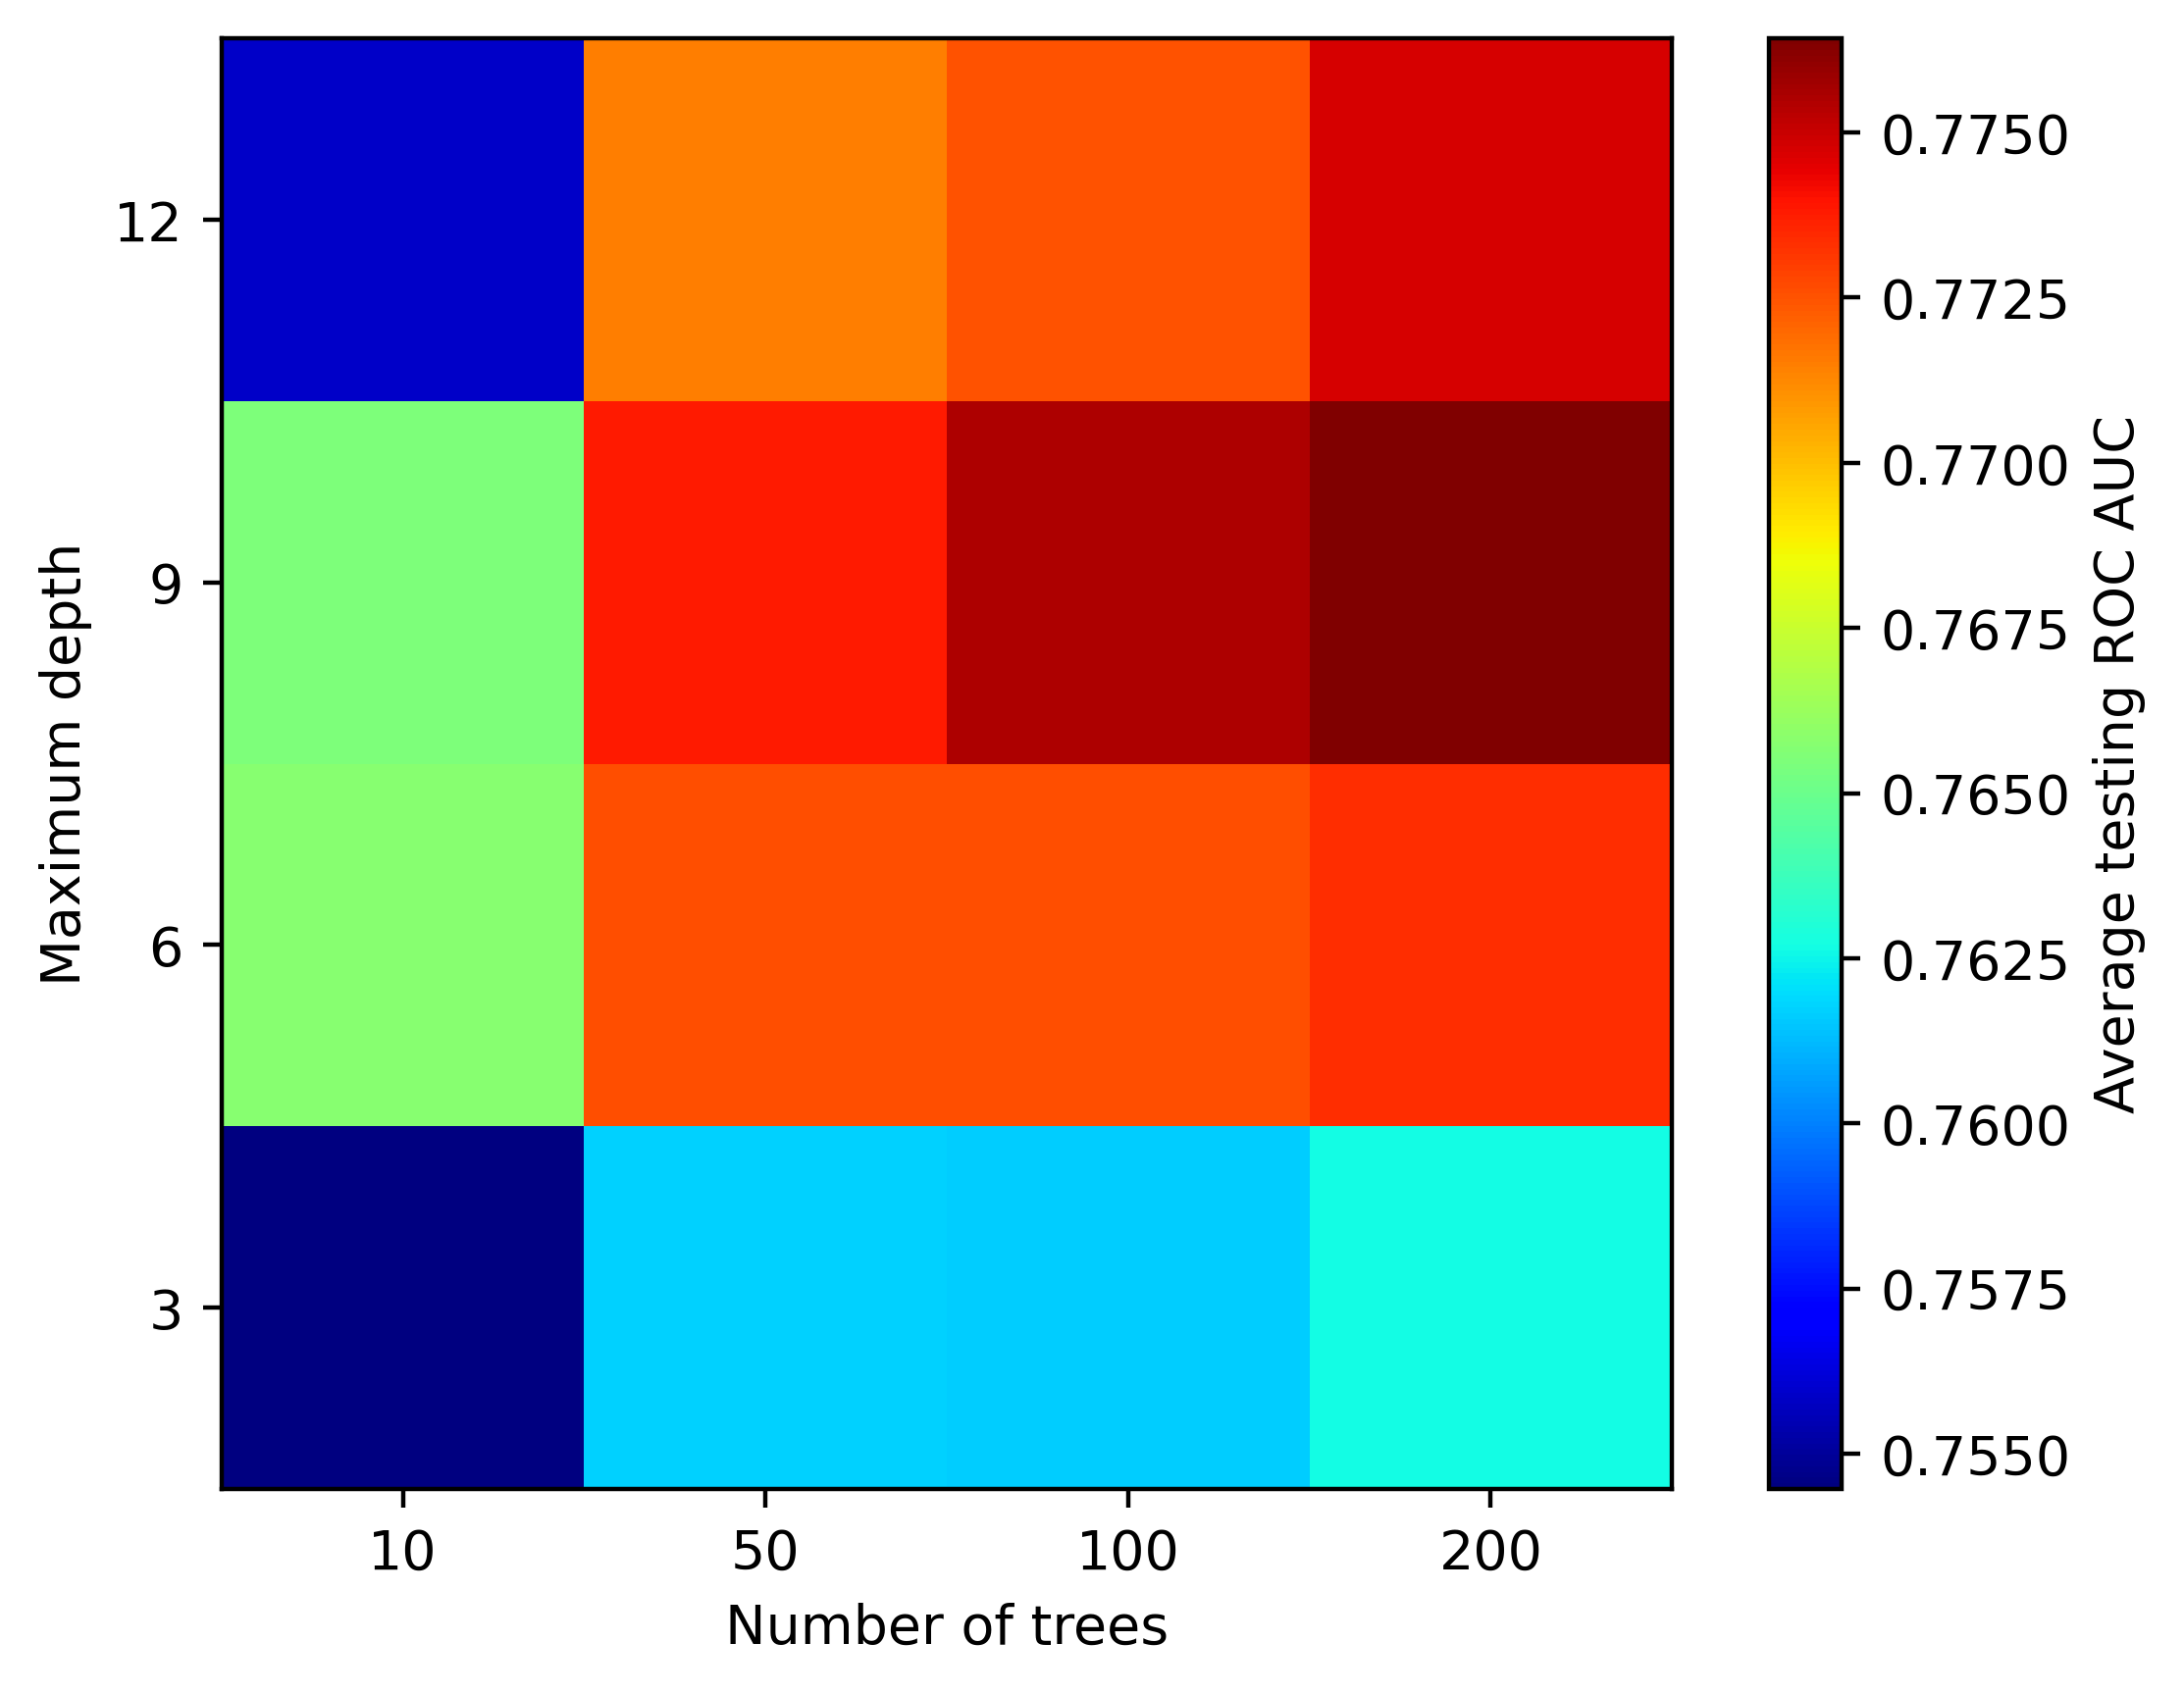

In [33]:
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(
    xx_rf, yy_rf,
    cv_rf_results_df['mean_test_score'].values.reshape((4,4)),
    cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels(
    [str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels(
    [str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

In [34]:
cv_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [35]:
feat_imp_df_act = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf.best_estimator_.feature_importances_
})

In [36]:
feat_imp_df_act.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.421179
0,LIMIT_BAL,0.061565
11,PAY_AMT1,0.060428
12,PAY_AMT2,0.048914
13,PAY_AMT3,0.045070
5,BILL_AMT1,0.043538
6,BILL_AMT2,0.041868
7,BILL_AMT3,0.040406
10,BILL_AMT6,0.034839
14,PAY_AMT4,0.034408
